In [1]:
from mylib.statistic_test import *

code_id = '0336 - Probability Curve Example'    
loc = join(figpath, code_id)
mkdir(loc)

# Load sequences from the pickle file
with open(r"E:\Anaconda\envs\maze\Lib\site-packages\mylib\test\demo_seq.pkl", 'rb') as handle:
    sequences = pickle.load(handle)

exp_seq = np.array([1,1,0,1,0,0,1,0,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1])
print(len(exp_seq))

from mylib.model import EqualRateDriftModel
from mylib.model import TwoProbabilityIndependentModel
from mylib.model import JointProbabilityModel
from mylib.model import HMM
from mylib.model import ContinuousHiddenStateModel
from mylib.model import ProbabilityRNN

e:\Anaconda\envs\maze\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


        E:\Data\FinalResults\0336 - Probability Curve Example is already existed!
26
Using device: cuda
Using device: cuda


In [2]:
from mylib.statistic_test import *

code_id = '0336 - Probability Curve Example'    
loc = join(figpath, code_id)
mkdir(loc)

# Load sequences from the pickle file
with open(r"E:\Anaconda\envs\maze\Lib\site-packages\mylib\test\demo_seq.pkl", 'rb') as handle:
    sequences = pickle.load(handle)

exp_seq = np.array([1,1,0,1,0,0,1,0,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1])
print(len(exp_seq))

from mylib.model import EqualRateDriftModel
from mylib.model import TwoProbabilityIndependentModel
from mylib.model import JointProbabilityModel
from mylib.model import HMM
from mylib.model import ContinuousHiddenStateModel
from mylib.model import ProbabilityRNN

M1 = EqualRateDriftModel()
M1.fit(sequences)
M1.calc_loss(sequences)
y1 = M1.get_predicted_prob([exp_seq])

M2 = TwoProbabilityIndependentModel()
M2.fit(sequences)
M2.calc_loss(sequences)
y2 = M2.get_predicted_prob([exp_seq])

M3 = JointProbabilityModel()
M3.fit(sequences)
M3.calc_loss(sequences)
y3 = M3.get_predicted_prob([exp_seq])

M4 = HMM.process_fit(N=20, sequences=sequences, n_iterations=100)
M4.calc_loss(sequences)
y4 = M4.get_predicted_prob([exp_seq])

M5 = ContinuousHiddenStateModel('poly2')
M5.fit(sequences)
M5.calc_loss(sequences)
y5 = M5.get_predicted_prob([exp_seq])

M6 = ProbabilityRNN.process_fit(
    sequences,
    split_ratio=0.8,
    hidden_size=32,
    lr=0.001,
    epochs=1000, 
    batch_size=2048
)
M6.calc_loss(sequences)
y6 = M6.get_predicted_prob([exp_seq])

        E:\Data\FinalResults\0336 - Probability Curve Example is already existed!
26
Simple Drift Model:
  Loss: 0.6990581187546758
  Parameters: (0.525448764922768,).



100%|██████████| 22482/22482 [00:00<00:00, 225490.62it/s]


Retention + Recovery Model:
  Loss: 0.5239414484720598
  Retention Parameters: [1.07718977 1.33990977]
  Recovery Parameters: [0.75961272 1.23601794].



e:\Anaconda\envs\maze\lib\site-packages\mylib\field\tracker_v2.py:92: RuntimeWarning: invalid value encountered in divide
  probs = probs[1:, :, 1]/np.sum(probs[1:, :, :], axis=2)


Joint Probability Model:
  Loss: 0.536067364240635
  Parameters: [-0.24914729  1.26372996  1.03357924  1.46201892].



100%|██████████| 100/100 [00:54<00:00,  1.84it/s]


Hidden Markov Model with 20 hidden states:
  Loss: 0.5180979652275485
  Transition Matrix: tensor([[6.8087e-01, 2.1332e-01, 6.6184e-02, 2.1250e-02, 7.6363e-03, 3.3303e-03,
         1.7636e-03, 1.0554e-03, 6.8772e-04, 4.8248e-04, 3.6272e-04, 1.3286e-04,
         2.5029e-04, 2.3433e-04, 2.4860e-04, 3.0715e-04, 4.0743e-04, 4.9363e-04,
         5.1180e-04, 4.7036e-04],
        [6.1149e-01, 2.2578e-01, 8.3636e-02, 3.2570e-02, 1.4428e-02, 7.6968e-03,
         4.7584e-03, 3.1836e-03, 2.2488e-03, 1.6675e-03, 1.2952e-03, 4.8412e-04,
         9.0224e-04, 8.3159e-04, 8.6268e-04, 1.0486e-03, 1.4021e-03, 1.7716e-03,
         1.9697e-03, 1.9747e-03],
        [5.0578e-01, 2.2262e-01, 1.0006e-01, 4.8366e-02, 2.7044e-02, 1.7879e-02,
         1.2915e-02, 9.5786e-03, 7.2354e-03, 5.5793e-03, 4.3998e-03, 1.7116e-03,
         2.9922e-03, 2.6835e-03, 2.7164e-03, 3.2847e-03, 4.4960e-03, 5.9686e-03,
         7.0798e-03, 7.6127e-03],
        [3.5343e-01, 1.8749e-01, 1.0381e-01, 6.3650e-02, 4.5922e-02, 3.8114e-0

100%|██████████| 1000/1000 [09:41<00:00,  1.72it/s]


Recurrent Neural Network Model:
  Loss: 0.521497386238266



In [3]:
M4 = HMM.process_fit(N=20, sequences=sequences, n_iterations=100)
M4.calc_loss(sequences)
y4 = M4.get_predicted_prob([exp_seq])

100%|██████████| 100/100 [00:59<00:00,  1.68it/s]


Hidden Markov Model with 20 hidden states:
  Loss: 0.5180979517876845
  Transition Matrix: tensor([[6.8087e-01, 2.1332e-01, 6.6184e-02, 2.1250e-02, 7.6363e-03, 3.3303e-03,
         1.7636e-03, 1.0554e-03, 6.8772e-04, 4.8248e-04, 3.6272e-04, 1.3286e-04,
         2.5029e-04, 2.3433e-04, 2.4860e-04, 3.0715e-04, 4.0743e-04, 4.9363e-04,
         5.1180e-04, 4.7036e-04],
        [6.1149e-01, 2.2578e-01, 8.3636e-02, 3.2570e-02, 1.4428e-02, 7.6968e-03,
         4.7584e-03, 3.1836e-03, 2.2488e-03, 1.6675e-03, 1.2952e-03, 4.8412e-04,
         9.0224e-04, 8.3159e-04, 8.6268e-04, 1.0486e-03, 1.4021e-03, 1.7716e-03,
         1.9697e-03, 1.9747e-03],
        [5.0578e-01, 2.2262e-01, 1.0006e-01, 4.8366e-02, 2.7044e-02, 1.7879e-02,
         1.2915e-02, 9.5786e-03, 7.2354e-03, 5.5793e-03, 4.3998e-03, 1.7116e-03,
         2.9922e-03, 2.6835e-03, 2.7164e-03, 3.2847e-03, 4.4960e-03, 5.9686e-03,
         7.0798e-03, 7.6127e-03],
        [3.5343e-01, 1.8749e-01, 1.0381e-01, 6.3650e-02, 4.5923e-02, 3.8114e-0

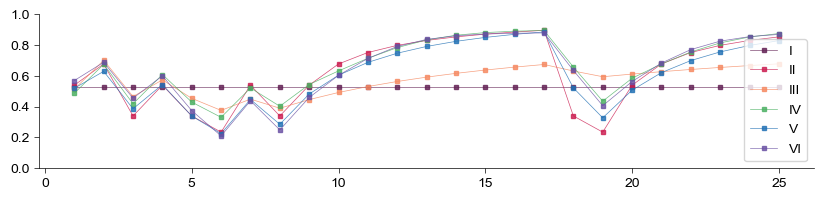

In [6]:
colors = sns.color_palette("rocket", 3) + sns.color_palette("Greens", 4) + sns.color_palette("Blues", 3) + sns.color_palette("Purples", 3)
fig = plt.figure(figsize=(10, 2))
x = np.arange(1, 26)
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks = True, ifyticks = True)
ax.plot(x, y1[0], marker='s', markersize=3, linewidth = 0.5, label = 'I', color = colors[0], alpha = 0.8)
ax.plot(x, y2[0], marker='s', markersize=3, linewidth = 0.5, label = 'II', color = colors[1], alpha = 0.8)
ax.plot(x, y3[0], marker='s', markersize=3, linewidth = 0.5, label = 'III', color = colors[2], alpha = 0.8)
ax.plot(x, y4[0], marker='s', markersize=3, linewidth = 0.5, label = 'IV', color = colors[5], alpha = 0.8)
ax.plot(x, y5[0], marker='s', markersize=3, linewidth = 0.5, label = 'V', color = colors[9], alpha = 0.8)
ax.plot(x, y6[0], marker='s', markersize=3, linewidth = 0.5, label = 'VI', color = colors[12], alpha = 0.8)
ax.set_ylim(0, 1)
ax.set_yticks(np.linspace(0,1,6))

plt.legend()
plt.savefig(join(loc, "example.png"), dpi=1200)
plt.savefig(join(loc, "example.svg"), dpi=1200)
plt.show()

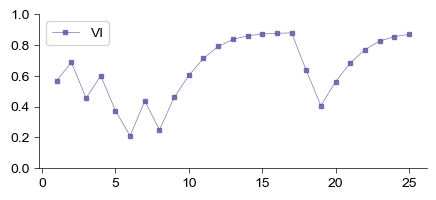

In [7]:
colors = sns.color_palette("rocket", 3) + sns.color_palette("Greens", 4) + sns.color_palette("Blues", 3) + sns.color_palette("Purples", 3)
fig = plt.figure(figsize=(5, 2))
x = np.arange(1, 26)
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks = True, ifyticks = True)
ax.plot(x, y6[0], marker='s', markersize=3, linewidth = 0.5, label = 'VI', color = colors[12], alpha = 0.8)
ax.set_ylim(0, 1)
ax.set_yticks(np.linspace(0,1,6))

plt.legend()
plt.savefig(join(loc, "example2.png"), dpi=1200)
plt.savefig(join(loc, "example2.svg"), dpi=1200)
plt.show()